In [28]:
import pandas as pd

# Use header at row 1 (skip row 0)
df = pd.read_csv('../data/TCS.NS_stock_data.csv', header=1)

# Rename columns manually
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Drop missing rows if any
df.dropna(inplace=True)

# Convert date and set index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Confirm fix
df.head()


,Close,High,Low,Open,Volume
Date,,,,,
2018-01-01,1186.140991,1208.199532,1181.388493,1202.595223,1351760.0
2018-01-02,1179.685181,1196.901692,1174.753386,1192.597537,1920290.0
2018-01-03,1183.025269,1196.632581,1179.685121,1180.043819,1257120.0
2018-01-04,1191.296753,1193.493598,1183.630015,1188.113462,913082.0
2018-01-05,1205.688721,1210.306694,1188.113628,1188.113628,1153706.0


In [29]:
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [30]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

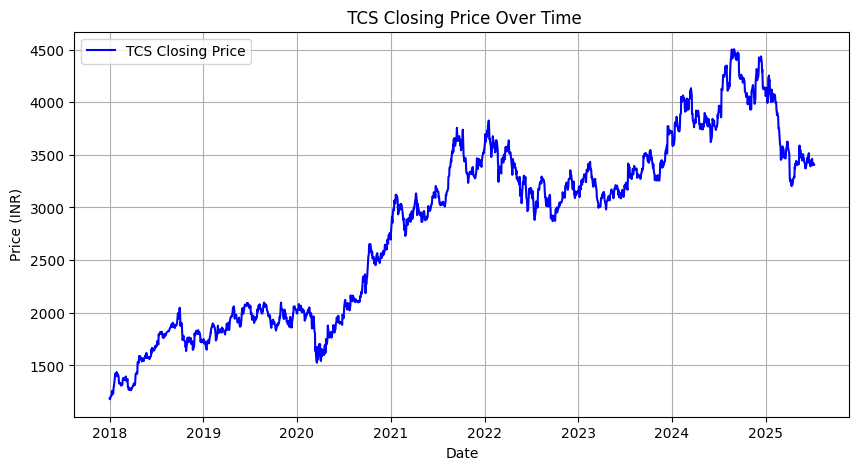

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='TCS Closing Price', color='blue')
plt.title(" TCS Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.legend()
plt.show()

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform the 'Close' prices
df['Scaled_Close'] = scaler.fit_transform(df[['Close']])

# Show the original and scaled values
df[['Close', 'Scaled_Close']].head()

,Close,Scaled_Close
Date,,
2018-01-01,1186.140991,0.001943
2018-01-02,1179.685181,0.000000
2018-01-03,1183.025269,0.001005
2018-01-04,1191.296753,0.003494
2018-01-05,1205.688721,0.007825


In [33]:
# Create a new column: number of days since the first date
df['Days'] = (df.index - df.index[0]).days

# Preview
df[['Days', 'Close', 'Scaled_Close']].head()

,Days,Close,Scaled_Close
Date,,,
2018-01-01,0,1186.140991,0.001943
2018-01-02,1,1179.685181,0.000000
2018-01-03,2,1183.025269,0.001005
2018-01-04,3,1191.296753,0.003494
2018-01-05,4,1205.688721,0.007825


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Features and labels
X = df[['Days']]         # independent variable
y = df['Close']          # target variable

# Split into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2:.4f}, Mean Squared Error: {mse:.2f}")

R-squared: -0.8024, Mean Squared Error: 186170.57


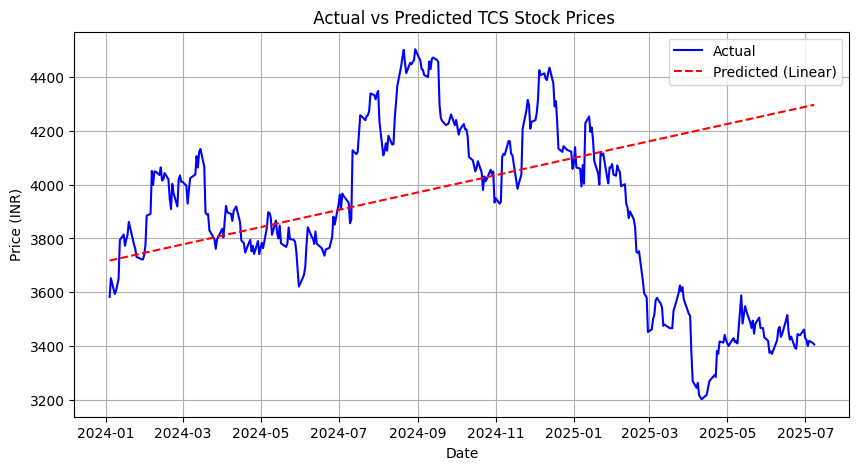

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted (Linear)', color='red', linestyle='--')
plt.title(" Actual vs Predicted TCS Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Save the current DataFrame to CSV
df.to_csv('../data/TCS_final_preprocessed.csv')
print("Final preprocessed data saved successfully.")

✅ Final preprocessed data saved successfully.


In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print(f" Random Forest R² Score: {rf_r2:.4f}")
print(f" Random Forest MSE: {rf_mse:.2f}")

 Random Forest R² Score: -0.6231
 Random Forest MSE: 167650.31


C:\Users\rusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


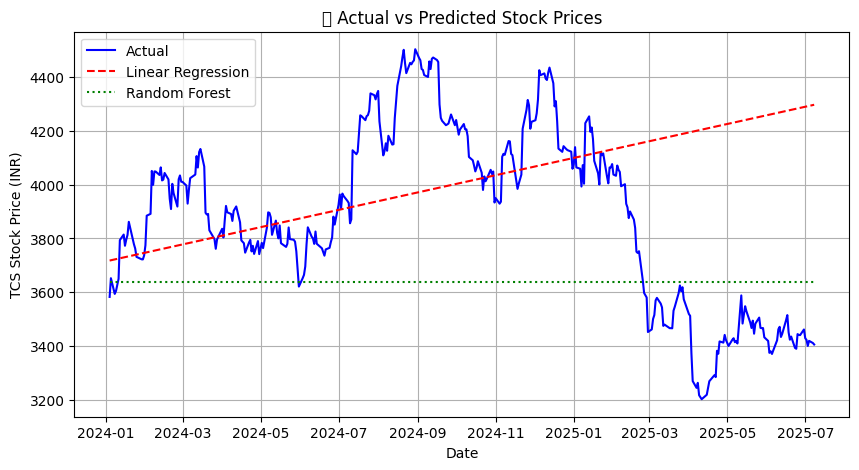

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Linear Regression', linestyle='--', color='red')
plt.plot(y_test.index, rf_pred, label='Random Forest', linestyle=':', color='green')

plt.title(" Actual vs Predicted Stock Prices")
plt.xlabel("Date")
plt.ylabel("TCS Stock Price (INR)")
plt.legend()
plt.grid(True)
plt.show()